<a href="https://colab.research.google.com/github/amoralles/ProjetoFinal_M4/blob/main/ProjetoFinal_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color ='#DAA520'><b>Resilia - Data Analytics: Módulo 4 💻</b></font>

<font size='4'>Você e a sua equipe foram escalados pela <b>Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)</b> para <b><font color = '#92D1C3'>realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.</b></font>

Serão utilizados os arquivos dos dois últimos meses do ano atual contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil que estão disponíveis no portal [dados.gov](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda). </font>

- <font size='3'>Inicialmente, realizamos a importação das seguintes bibliotecas: <b>pandas, numpy, datetime e seaborn.</b></font>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sn

#<font color ='#DAA520'><b>Limpeza e Preparação dos Dados 🧹</b></font>

In [ ]:
julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', delimiter=';')

In [ ]:
agosto = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', delimiter=';')

In [ ]:
dados_jul = pd.DataFrame(julho)
dados_jul.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
dados_ago = pd.DataFrame(agosto)
dados_ago.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados = pd.concat([dados_jul, dados_ago], ignore_index = True)
conj_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
(conj_dados.isnull().mean() * 100).sort_values(ascending=False)

Valor de Compra      100.000000
Complemento           78.707461
Bairro                 0.323960
Numero Rua             0.055828
Regiao - Sigla         0.000000
Estado - Sigla         0.000000
Municipio              0.000000
Revenda                0.000000
CNPJ da Revenda        0.000000
Nome da Rua            0.000000
Cep                    0.000000
Produto                0.000000
Data da Coleta         0.000000
Valor de Venda         0.000000
Unidade de Medida      0.000000
Bandeira               0.000000
dtype: float64

Calcula a porcentagem de dados faltantes em cada coluna. Sendo 'Valor de compra' como 100, quer dizer que todos os valores dessa coluna são nulos.

In [ ]:
conj_dados['Valor de Venda'] = conj_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))
conj_dados.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados = conj_dados.drop(['Valor de Compra'], axis=1)
conj_dados.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados['Complemento'].fillna('0', inplace = True)

In [ ]:
conj_dados.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA,01/07/2022,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,5.99,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados.shape[:]

(127176, 15)

In [ ]:
conj_dados['Data da Coleta'] = pd.to_datetime(conj_dados['Data da Coleta'], format = '%d/%m/%Y')


In [ ]:
conj_dados.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,0,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,R$ / litro,VIBRA ENERGIA


In [ ]:
conj_dados['Data da Coleta'][0]


Timestamp('2022-07-01 00:00:00')

In [ ]:
type(conj_dados['Valor de Venda'][0])

numpy.float64

#<font color ='#DAA520'><b>Análise 📓</b></font>

Quando analizamos séries temporais, ou seja, quando temos uma coleção de obserações ao longo do tempo, instintivamente nos perguntamos: Como essas obervações se alteraram ao longo do período de observações? Nessa análise, tentamos responder as seguintes perguntas:

##1. Como se comportaram o preço dos combustíveis durante os dois meses citados? 

Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?

Para isso, selecionamos um *subset* do dataframe original apenas com as informações relevantes para essa respota: Qual o produto iremos avaliar, o valor que o produto foi vendido e quando. Calculamos uma média por dia do valor desse produto, para que pudessemos ter uma visão mais geral do valor do produto.

In [ ]:
preco_por_dia = conj_dados.groupby(['Data da Coleta', 'Produto']).mean('Valor de Venda')
preco_por_dia

Valor de Venda
Data da Coleta Produto                           
2022-07-01     ETANOL                    5.395652
               GASOLINA                  7.173200
               GASOLINA ADITIVADA        7.248261
2022-07-04     ETANOL                    4.879523
               GASOLINA                  6.612834
...                                           ...
2022-08-30     GASOLINA                  5.213140
               GASOLINA ADITIVADA        5.399597
2022-08-31     ETANOL                    3.994470
               GASOLINA                  5.194275
               GASOLINA ADITIVADA        5.354558

[132 rows x 1 columns]

Em seguida, optamos por resetar os valores do índice, de forma que a Data da Coleta passase a ser uma coluna de dados, e não o índice do dataset. 

In [ ]:
preco_por_dia.reset_index(inplace= True)
preco_por_dia.head(2)

,Data da Coleta,Produto,Valor de Venda
0,2022-07-01,ETANOL,5.395652
1,2022-07-01,GASOLINA,7.173200


In [ ]:
preco_por_dia.shape[:]

(132, 3)

Para melhor visualizar a tendência no preço dos  produtos, plotamos um gráfico de linhas para cada um dos três produtos observados ao longo dos meses. 📈📉

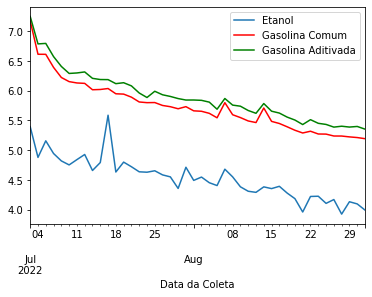

In [ ]:
graf1 = preco_por_dia[preco_por_dia['Produto'] == 'ETANOL'].plot.line(x='Data da Coleta', y='Valor de Venda', label = 'Etanol')
graf2 = preco_por_dia[preco_por_dia['Produto'] == 'GASOLINA'].plot.line(x='Data da Coleta', y='Valor de Venda', color = 'red', label = 'Gasolina Comum', ax=graf1 )
graf3 = preco_por_dia[preco_por_dia['Produto'] == 'GASOLINA ADITIVADA'].plot.line(x='Data da Coleta', y='Valor de Venda', color = 'green', label = 'Gasolina Aditivada', ax=graf2 )

Com isso, podemos observar que de julho de 2022 até o final de agosto de 2022, o valor da Gasolina (comum ou aditivada) e o valor do etanol diminuiram. 

##2. Qual o preço médio da gasolina e do etanol nesses dois meses?

Para calcular o preço médio dos produtos nesses dois meses , realizamos um subset em que selecionamos somente o produto e o valor de venda final. Com isso utilizamos a fórmula da média para conseguir obter o resultado desejado.

In [ ]:
preco_medio_tempo= conj_dados.groupby(['Produto']).mean('Valor de Venda')
preco_medio_tempo

,Valor de Venda
Produto,
ETANOL,4.506026
GASOLINA,5.711579
GASOLINA ADITIVADA,5.887813


##4. Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
preco_medio= conj_dados.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')
preco_medio

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                    5.376684
               GASOLINA                  6.211454
               GASOLINA ADITIVADA        6.177801
AL             ETANOL                    5.240854
               GASOLINA                  5.944651
...                                           ...
SP             GASOLINA                  5.527844
               GASOLINA ADITIVADA        5.773200
TO             ETANOL                    5.151095
               GASOLINA                  6.046250
               GASOLINA ADITIVADA        6.176667

[81 rows x 1 columns]

Neste caso o primeiro passo foi selecionar as informações que eram relevantes, e fazer a média por cada estado.

##3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

O primeiro passo foi selecionar o nosso dataframe

In [ ]:
valores_ordenados = preco_medio.sort_values('Valor de Venda')
valores_ordenados

,Estado - Sigla,Produto,Valor de Venda
36,MT,ETANOL,3.805687
75,SP,ETANOL,3.895819
24,GO,ETANOL,4.060479
30,MG,ETANOL,4.250565
33,MS,ETANOL,4.407469
...,...,...,...
2,AC,GASOLINA ADITIVADA,6.177801
7,AM,GASOLINA,6.188049
17,CE,GASOLINA ADITIVADA,6.197571
1,AC,GASOLINA,6.211454


In [ ]:
preco_medio.reset_index(inplace=True)

Com isso selecionamos cada produto e consultamos a 5 primeiras médias com valores maiores.

### **ETANOL**

In [ ]:
dados_etanol = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
dados_etanol.head(5)
dados_etanol.sort_values('Valor de Venda')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
125423,SE,SP,PRESIDENTE PRUDENTE,AUTO POSTO PRUDENTINO LTDA,52.531.860/0001-55,AVENIDA BRASIL,3040,B,VILA FORMOSA,19013-002,ETANOL,2022-08-31,2.89,R$ / litro,BRANCA
125405,SE,SP,PRESIDENTE PRUDENTE,AUTO POSTO LADOME LTDA,04.925.454/0001-24,AVENIDA BRASIL,2592,0,VILA FORMOSA,19013-002,ETANOL,2022-08-31,2.92,R$ / litro,BRANCA
125442,SE,SP,PRESIDENTE PRUDENTE,TANCREDO POSTO DE SERVICO LTDA,00.027.652/0001-10,AVENIDA TANCREDO NEVES,50,0,VILA BRASIL,19040-520,ETANOL,2022-08-31,2.94,R$ / litro,BRANCA
118566,SE,SP,JOSE BONIFACIO,AUTO POSTO TAKAO JOSE BONIFACIO LTDA,21.350.801/0001-57,RODOVIA SP 425 - ASSIS CHATEAUBRIAND,S/N,KM 232+206 METROS,ZONA RURAL,15200-000,ETANOL,2022-08-29,2.94,R$ / litro,BRANCA
125407,SE,SP,PRESIDENTE PRUDENTE,POSTO BARAO BRASIL LTDA,08.170.461/0001-14,AVENIDA BRASIL,693,0,CENTRO,19010-031,ETANOL,2022-08-31,2.94,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,N,PA,CONCEICAO DO ARAGUAIA,FERNANDO O. B. BARRA E CIA. LTDA.,15.755.663/0001-93,AVENIDA JUSCELINO KUBSTCHESK,S/N,0,CENTRO,68540-000,ETANOL,2022-07-06,7.50,R$ / litro,BRANCA
69,SE,RJ,TRES RIOS,POSTO DE ABASTECIMENTO TRERIENSE LTDA,10.845.332/0001-20,RUA NELSON VIANA,552,0,PORTAO VERMELHO,25805-290,ETANOL,2022-07-01,7.65,R$ / litro,BRANCA
26839,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,0,CENTRO,96415-100,ETANOL,2022-07-14,7.89,R$ / litro,IPIRANGA
9260,S,RS,BAGE,L. CASTRO COMERCIO DE COMBUSTIVEIS LTDA,05.799.373/0002-79,RUA EMÍLIO GUILAIN,673,0,CENTRO,96415-100,ETANOL,2022-07-06,7.89,R$ / litro,IPIRANGA


In [ ]:
preco_medio_etanol = dados_etanol.groupby('Estado - Sigla').mean('Valor de Venda').sort_values('Valor de Venda',ascending = False)
preco_medio_etanol.head()

,Valor de Venda
Estado - Sigla,
AP,5.896250
RS,5.660152
PA,5.624816
RO,5.599120
RR,5.568182


### **GASOLINA**

In [ ]:
dados_gasolina = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]
dados_gasolina.head(5)
dados_gasolina.sort_values('Valor de Venda')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
115938,S,RS,PASSO FUNDO,POSTO DE COMBUSTIVEIS BROCK E CIFRA LTDA,07.608.132/0001-40,AVENIDA BRASIL LESTE,85,0,CENTRO,99050-000,GASOLINA,2022-08-29,4.13,R$ / litro,IPIRANGA
115935,S,RS,PASSO FUNDO,COMERCIAL BUFFON COMBUSTIVEIS E TRANSPORTES LI...,93.489.243/0025-93,AVENIDA BRASIL LESTE,1010,0,PETROPOLIS,99050-144,GASOLINA,2022-08-29,4.15,R$ / litro,IPIRANGA
117451,SE,SP,SUMARE,AUTO POSTO BANGAI LTDA,08.299.531/0001-39,RUA BERNARDO GUIMARAES,190,0,PARQUE R. VIRGNIO BASSO,13174-295,GASOLINA,2022-08-29,4.15,R$ / litro,RAIZEN
118550,S,RS,PASSO FUNDO,S S COMERCIO DE COMBUSTIVEIS SA,01.991.461/0023-41,AVENIDA PRESIDENTE VARGAS,3767,0,SAO CRISTOVAO,99064-000,GASOLINA,2022-08-29,4.16,R$ / litro,RAIZEN
119257,S,RS,PASSO FUNDO,S S COMERCIO DE COMBUSTIVEIS SA,01.991.461/0037-47,AVENIDA PRESIDENTE VARGAS,1348,0,VILA RODRIGUES,99070-000,GASOLINA,2022-08-29,4.16,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,NE,AL,DELMIRO GOUVEIA,AUTO POSTO DA PEDRA LTDA,05.518.639/0003-49,RUA FREITAS CAVALCANTES,10,0,CENTRO,57480-000,GASOLINA,2022-07-04,8.21,R$ / litro,VIBRA ENERGIA
81,NE,AL,DELMIRO GOUVEIA,AUTO POSTO DA PEDRA LTDA,05.518.639/0001-87,RUA FLORIANO PEIXOTO,281,0,CENTRO,57480-000,GASOLINA,2022-07-04,8.21,R$ / litro,BRANCA
13576,NE,BA,IRECE,COMERCIAL RADAR COMBUSTIVEIS LTDA,15.282.816/0001-22,AVENIDA PRIMEIRO DE JANEIRO,1150,0,CENTRO,44900-000,GASOLINA,2022-07-07,8.22,R$ / litro,BRANCA
1771,NE,CE,CRATEUS,J LEITAO E COMPANHIA LTDA,07.569.593/0001-50,RUA FREI VIDAL DA PENHA,1388,0,SAO JOSE,63704-015,GASOLINA,2022-07-04,8.52,R$ / litro,VIBRA ENERGIA


In [ ]:
preco_medio_gasolina = dados_gasolina.groupby('Estado - Sigla').mean('Valor de Venda').sort_values('Valor de Venda',ascending = False)
preco_medio_gasolina.head()

,Valor de Venda
Estado - Sigla,
AC,6.211454
AM,6.188049
PI,6.075050
TO,6.046250
BA,6.030862


##6. Qual o município que possui o maior preço para a gasolina e para o etanol?

Para essa pesquisa localizamos o produto específico como a gasolina e o etanol na coluna "Produto", nessa pesquisa selecionamos series especificas e em seguida, com base nessas series procuramos o maior valor referente à coluna "Valor de venda" para cada produto, no final informamos qual o o maior valor de venda de cada produto e em qual município. O . loc nos auxiliou a localizar e especificar series e o .idxmax nos informou o maior valor.

In [ ]:
max_gasolina_mun = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]
max_gasolina_mun = max_gasolina_mun.loc[(max_gasolina_mun['Valor de Venda'].idxmax())]
max_gasolina_mun = max_gasolina_mun[['Municipio', 'Valor de Venda']]
max_gasolina_mun
#O Município com maior valor de gasolina

Municipio         GURUPI
Valor de Venda      8.75
Name: 88341, dtype: object

In [ ]:
max_etanol_mun = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
max_etanol_mun = max_etanol_mun.loc[(max_etanol_mun['Valor de Venda'].idxmax())]
max_etanol_mun = max_etanol_mun[['Municipio', 'Valor de Venda']]
max_etanol_mun
#O Município com maior valor de etanol

Municipio         BAGE
Valor de Venda    7.89
Name: 9260, dtype: object

##5. Qual o município que possui o menor preço para a gasolina e para o etanol?

Usamos as mesmas funcionalidades na questão anterior, porém, foi usado o .idxmin  para nos informar o menor valor de cada produto.

In [ ]:
min_gasolina_mun = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]
min_gasolina_mun = min_gasolina_mun.loc[(min_gasolina_mun['Valor de Venda'].idxmin())]
min_gasolina_mun = min_gasolina_mun[['Municipio', 'Valor de Venda']]
min_gasolina_mun
#O Município com menor valor de gasolina

Municipio         PASSO FUNDO
Valor de Venda           4.13
Name: 115938, dtype: object

In [ ]:
min_etanol_mun = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
min_etanol_mun = min_etanol_mun.loc[(min_etanol_mun['Valor de Venda'].idxmin())]
min_etanol_mun = min_etanol_mun[['Municipio', 'Valor de Venda']]
min_etanol_mun
#O Município com menor valor de etanol

Municipio         PRESIDENTE PRUDENTE
Valor de Venda                   2.89
Name: 125423, dtype: object

##7. Qual a região que possui o maior valor médio da gasolina?

In [ ]:
med_gasolina_reg = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
med_gasolina_reg = med_gasolina_reg.groupby[(med_gasolina_reg['Valor de Venda'].idxmax())]
med_gasolina_reg = med_gasolina_reg[['Municipio', 'Valor de Venda']]
med_gasolina_reg

##8. Qual a região que possui o menor valor médio do etanol?

Para responder essa pergunta, selecionamos um *subset* do dataframe original apenas com as informações relevantes para essa respota. Calculamos a média do etanol por região, e filtramos o valor mínimo.

In [ ]:
min_etanol = conj_dados.loc[(conj_dados['Produto'] == 'ETANOL')]

min_etanol = min_etanol.groupby(['Regiao - Sigla', 'Produto']).mean('Valor de Venda')

min_etanol = min_etanol.loc[[min_etanol['Valor de Venda'].idxmin()]]

min_etanol

,,Valor de Venda
Regiao - Sigla,Produto,
CO,ETANOL,4.107305


##9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?


##10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

Podemos pensar também se existe dependência entre outras duas variáveis, por exemplo:

Mais uma vez, vamos selecionar em um novo *subset* apenas as colunar relevantes para a análise: Bandeira, Produto e Valor de Venda.

In [ ]:
valor_bandeira = conj_dados[['Bandeira', 'Produto', 'Valor de Venda']]
valor_bandeira

,Bandeira,Produto,Valor de Venda
0,VIBRA ENERGIA,GASOLINA ADITIVADA,7.48
1,VIBRA ENERGIA,GASOLINA,7.38
2,VIBRA ENERGIA,ETANOL,5.99
3,VIBRA ENERGIA,GASOLINA,7.39
4,IPIRANGA,GASOLINA ADITIVADA,6.49
...,...,...,...
127171,IPIRANGA,ETANOL,3.99
127172,IPIRANGA,GASOLINA,5.19
127173,IPIRANGA,GASOLINA ADITIVADA,5.19
127174,BRANCA,GASOLINA,5.27


Para calcular a correlação, tanto numericamente quanto para a execução do gráfico de *heatmap* precisamos que as varáveis sejam quantitativas, ou seja, que elas sejam representadas por um valor. Para isso, avaliou-se primeiramente quantas bandeiras diferentes existem no nosso *dataset*.

In [ ]:
a = valor_bandeira['Bandeira'].unique()
len(a)

49

Existem 49 bandeiras diferentes. Iremos atribuir um valor de 0 a 48 para cada uma dessas bandeiras diferentes. E para isso criamos uma função:

In [ ]:
def mapeando(df):
  a = valor_bandeira['Bandeira'].unique()
  c = 0
  for i in a:
    df['Bandeira'] = df['Bandeira'].replace(i, c)
    c = c +1

mapeando(valor_bandeira)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Abaixo podemos ver que os valores para "Bandeira" agora são numéricos/;

In [ ]:
valor_bandeira['Bandeira'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

É necessário realizar o mesmo procedimento para os produtos. É sabido que exitem apenas 3 produtos diferentes no Dataset: Etanol, Gasolina e Gasolina Aditivada, mas para essa análise, separamos apenas em Etanol e Gasolina, uma vez que o valor da gasolina aditivada é muito semelhante ao da gasolina e varia sempre na mesma proporção.

In [ ]:
valor_bandeira['Produto'] = valor_bandeira['Produto'].apply(lambda x: 1 if x == 'ETANOL' else 2 )
valor_bandeira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bandeira,Produto,Valor de Venda
0,0,2,7.48
1,0,2,7.38
2,0,1,5.99
3,0,2,7.39
4,1,2,6.49
...,...,...,...
127171,1,1,3.99
127172,1,2,5.19
127173,1,2,5.19
127174,2,2,5.27


Com os dados prontos, podemos calcular a tabela de correlação entre as varáveis

In [ ]:
corr = valor_bandeira.corr()
corr

,Bandeira,Produto,Valor de Venda
Bandeira,1.000000,0.016663,0.035793
Produto,0.016663,1.000000,0.703472
Valor de Venda,0.035793,0.703472,1.000000


Podemos observar que existe uma correlação entre o valor de venda e o do produto, como é de se esperar, uma vez que o valor do etanol e da gasolina são bem diferentes, mas não existe correlação significativa entre o valor de venda e a bandeira (0.03). A vizualização em forma de *heatmap* pode ser observada logo abaixo

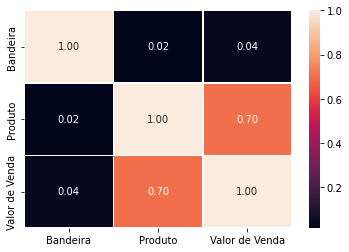

In [ ]:
plot1 = sn.heatmap(corr, annot = True, fmt=".2f", linewidths=.6);

Isso nos leva a concluir que o preço da gasolina e do etanol não varia significativamente de acordo com a bandeira que o vende. 

# <font color ='#DAA520'><b>Outras perguntas que nos permitem tirar mais dados relevantes do *dataset* 👩‍💻</b></font>

## 11. Quais os estados que valem mais a pena para abastecer com gasolina? E com etanol?

## 12. Qual estado que tem a maior e a menor variação de preço do etanol e da gasolina?

## Etanol

In [61]:
et_var = conj_dados.loc[(conj_dados['Produto']=='ETANOL')]
et_var = et_var.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')

et_var = et_var.pct_change()#calcular a variação 

et_var = et_var.sort_values('Valor de Venda')

et_var 

,,Valor de Venda
Estado - Sigla,Produto,
SP,ETANOL,-0.235012
MG,ETANOL,-0.202822
GO,ETANOL,-0.181956
BA,ETANOL,-0.139392
MT,ETANOL,-0.136537
DF,ETANOL,-0.133697
PR,ETANOL,-0.113204
PB,ETANOL,-0.092767
SC,ETANOL,-0.078809


### Os estados com a  menor variação de etanol:

In [56]:
et_var.head()#filtra as 5 primeiras linhas

,,Valor de Venda
Estado - Sigla,Produto,
SP,ETANOL,-0.235012
MG,ETANOL,-0.202822
GO,ETANOL,-0.181956
BA,ETANOL,-0.139392
MT,ETANOL,-0.136537


### Os estados com a maior variação de etanol:

In [55]:
et_var.tail()#filtra as 5 últimas linhas

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,0.190444
MA,ETANOL,0.313149
TO,ETANOL,0.322211
PA,ETANOL,0.478003
AC,ETANOL,NaN


### Gráfico da variação dos valores de venda do etanol

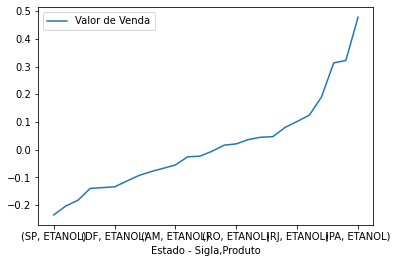

In [57]:
et_var[['Valor de Venda']].plot();

## Gasolina

In [68]:
gas_var = conj_dados.loc[(conj_dados['Produto']=='GASOLINA')]
gas_var = gas_var.groupby(['Estado - Sigla', 'Produto']).mean('Valor de Venda')

gas_var = gas_var.pct_change()#calcular a variação 
gas_var = gas_var.sort_values('Valor de Venda')

gas_var

,,Valor de Venda
Estado - Sigla,Produto,
AP,GASOLINA,-0.174690
PR,GASOLINA,-0.073128
RS,GASOLINA,-0.066627
DF,GASOLINA,-0.059546
GO,GASOLINA,-0.047852
MG,GASOLINA,-0.047011
PB,GASOLINA,-0.044285
AL,GASOLINA,-0.042953
RO,GASOLINA,-0.032527


### Estados com menor variação no valor da gasolina

In [65]:
gas_var.head()

,,Valor de Venda
Estado - Sigla,Produto,
AP,GASOLINA,-0.174690
PR,GASOLINA,-0.073128
RS,GASOLINA,-0.066627
DF,GASOLINA,-0.059546
GO,GASOLINA,-0.047852


### Estados com maior varianção no valor da gasolina

In [66]:
gas_var.tail()

,,Valor de Venda
Estado - Sigla,Produto,
PA,GASOLINA,0.058857
MA,GASOLINA,0.077973
TO,GASOLINA,0.093781
BA,GASOLINA,0.180888
AC,GASOLINA,NaN


###Gráfico da varianção dos valores de venda da gasolina

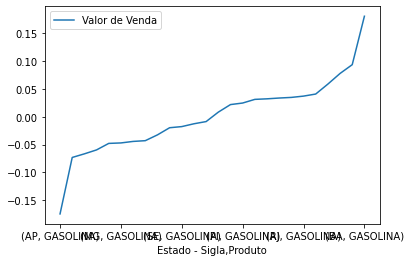

In [67]:
gas_var[['Valor de Venda']].plot();